In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [19]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [20]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.24, random_state=0)

In [21]:
# created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Prediction based on probability
model_prob = model.predict_proba(X_test)

In [24]:
# focus on positive outcome
model_prob = model_prob[:,1]

In [25]:
# Calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9071463296062228


In [26]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [27]:
thresholds

array([           inf, 9.99254448e-01, 9.47459580e-01, 9.47446348e-01,
       9.38774948e-01, 9.30943694e-01, 9.29031303e-01, 9.23730823e-01,
       9.02033391e-01, 8.91583244e-01, 8.50811534e-01, 8.46699037e-01,
       8.38132833e-01, 8.36922609e-01, 8.14634414e-01, 8.13979525e-01,
       7.97276844e-01, 7.96253506e-01, 7.94932890e-01, 7.79453460e-01,
       7.26894560e-01, 7.21007289e-01, 6.74971961e-01, 6.50129599e-01,
       6.16019308e-01, 5.97602873e-01, 5.93699328e-01, 5.92119487e-01,
       5.41100338e-01, 5.37750557e-01, 5.35737117e-01, 5.19791042e-01,
       5.05995635e-01, 4.94446016e-01, 4.73850841e-01, 4.53983224e-01,
       4.28461845e-01, 4.25460886e-01, 3.90657121e-01, 3.78106043e-01,
       3.69975635e-01, 3.43068299e-01, 3.24325111e-01, 3.07277581e-01,
       3.03412313e-01, 2.60393304e-01, 2.32679652e-01, 2.07368550e-01,
       1.93907467e-01, 1.32752667e-01, 1.32564477e-01, 1.29464153e-01,
       1.28739580e-01, 1.05712781e-01, 1.04312836e-01, 6.78348455e-02,
      

In [28]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00826446, 0.00826446,
        0.01652893, 0.01652893, 0.02479339, 0.02479339, 0.04958678,
        0.04958678, 0.0661157 , 0.0661157 , 0.07438017, 0.07438017,
        0.08264463, 0.08264463, 0.09090909, 0.09090909, 0.09917355,
        0.09917355, 0.10743802, 0.10743802, 0.11570248, 0.11570248,
        0.1322314 , 0.1322314 , 0.14049587, 0.14049587, 0.14876033,
        0.14876033, 0.15702479, 0.15702479, 0.19008264, 0.19008264,
        0.20661157, 0.20661157, 0.21487603, 0.21487603, 0.2231405 ,
        0.2231405 , 0.23966942, 0.23966942, 0.24793388, 0.24793388,
        0.27272727, 0.27272727, 0.30578512, 0.30578512, 0.40495868,
        0.40495868, 0.41322314, 0.41322314, 0.45454545, 0.45454545,
        0.52892562, 0.52892562, 0.56198347, 0.56198347, 0.62809917,
        0.62809917, 0.94214876, 0.94214876, 1.        ]),
 array([0.        , 0.00840336, 0.28571429, 0.28571429, 0.36134454,
        0.36134454, 0.3697479 , 0.3697479 , 0.43697479, 0.

In [29]:
import seaborn as sns

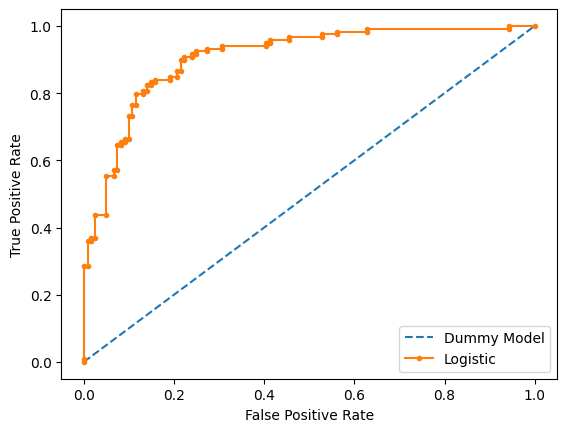

In [30]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

C:\Users\gerra\AppData\Local\Temp\ipykernel_19208\4145494253.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


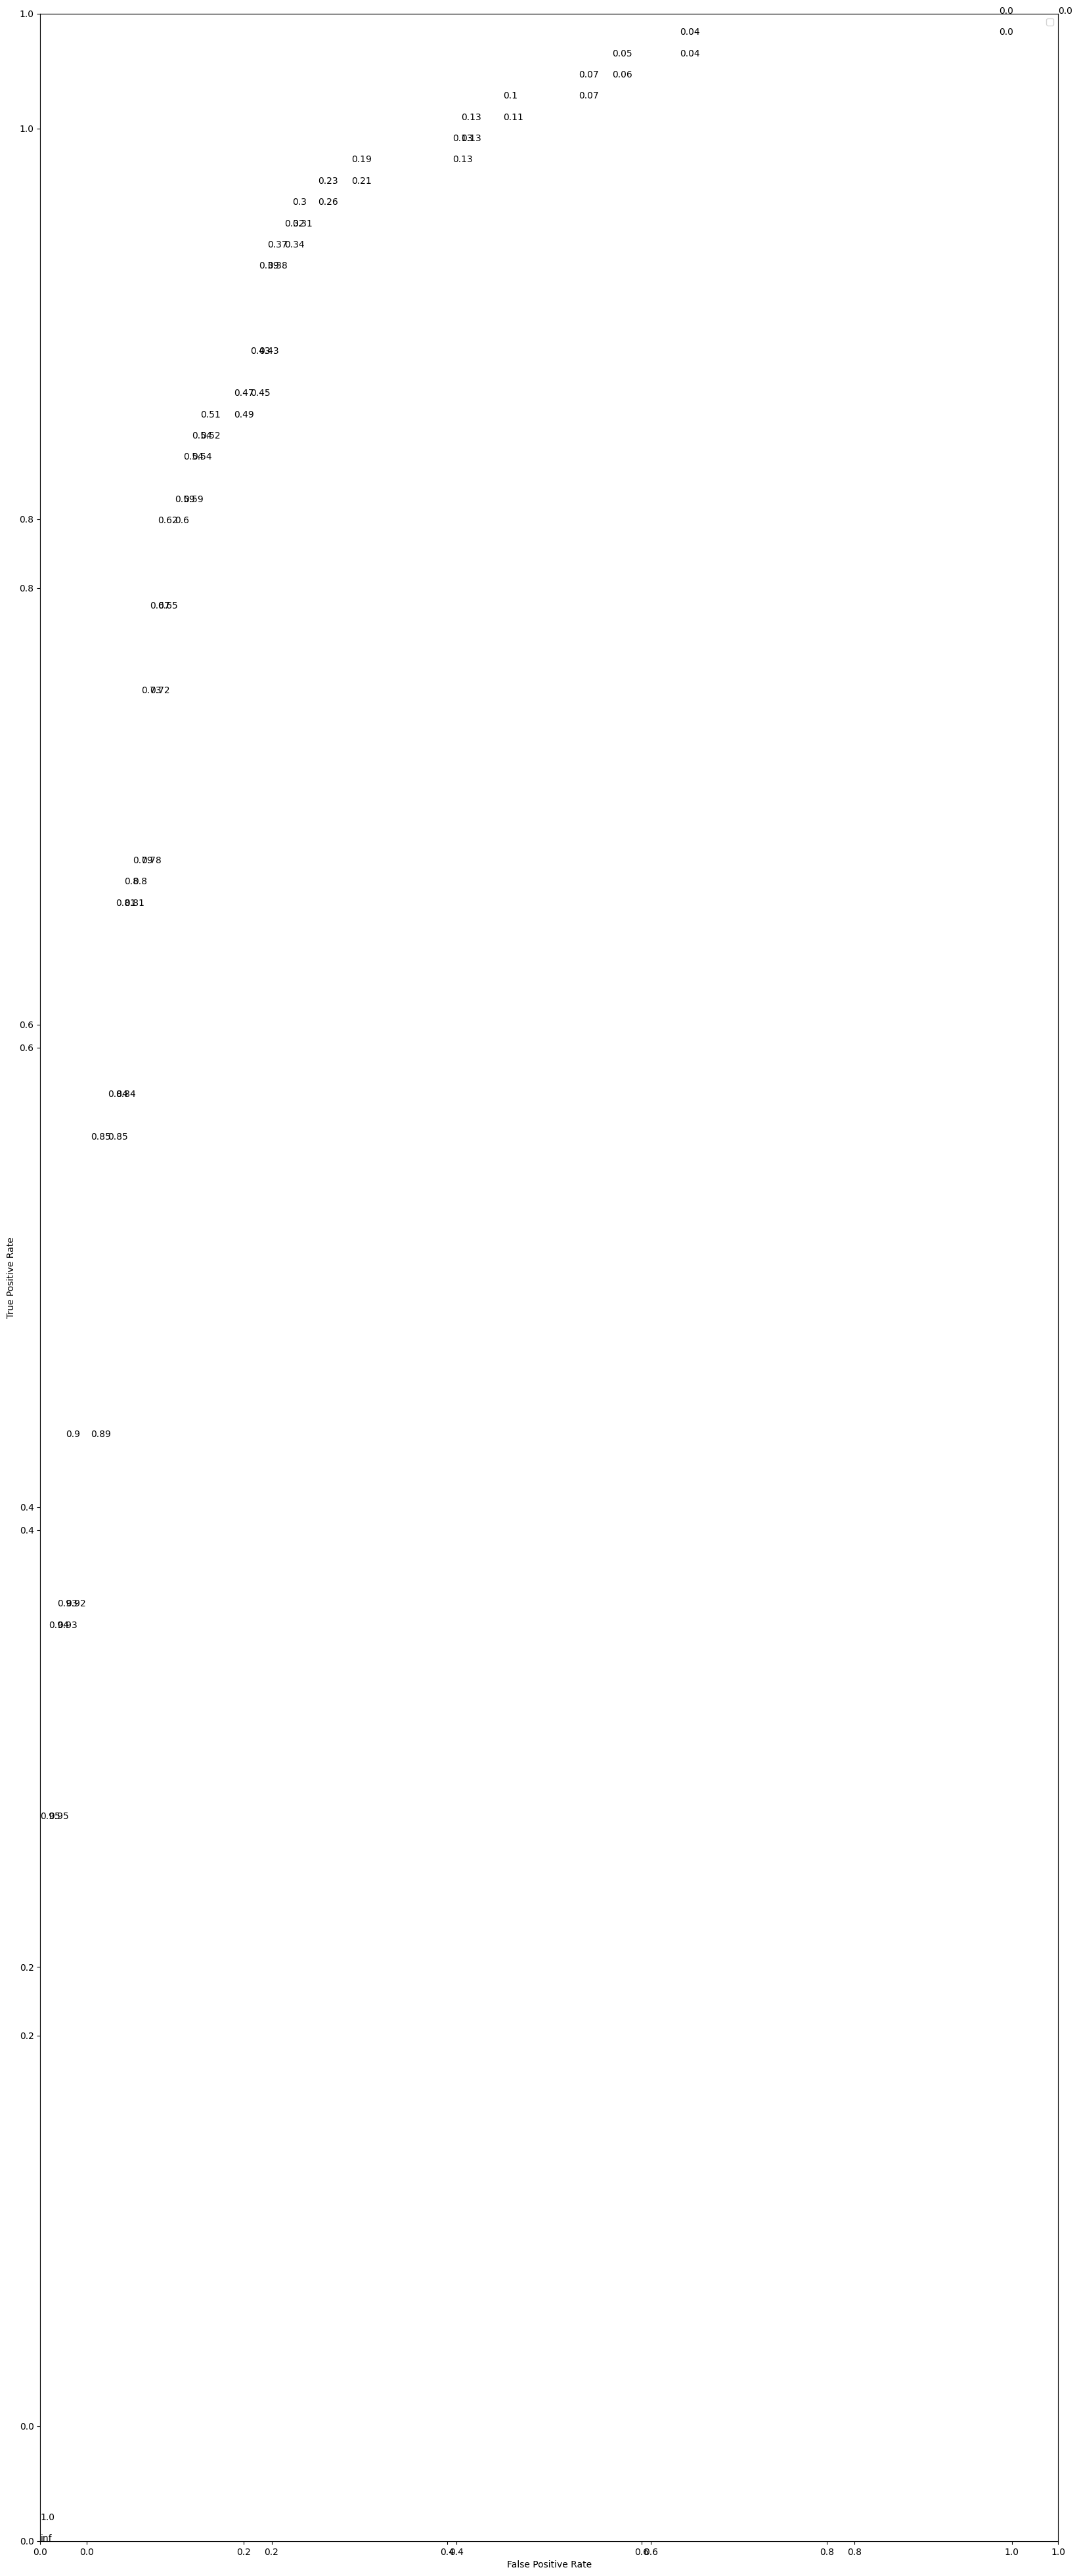

In [31]:
# plot the roc curve for the model
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()